In [1]:
class tagAnalytics(self):



filename = 'relevant_cards.csv'

my_file = open(filename, 'r')
my_string = my_file.read()
my_string = my_string.replace('#', '')

my_list = my_string.split('\n')

# convert to card: [tags] dictionary

tag_dict = {}

for c in my_list:
    tmp = c.split('|')
    tag_dict[tmp[0]] = tmp[1:]
    
# count tags

tag_count = {}

for c in tag_dict.keys():
    for t in tag_dict[c]:
        if t not in tag_count:
            tag_count[t] = 1
        else:
            tag_count[t] += 1
 
relevant_tags = []    
for t in tag_count:
    if tag_count[t] > 50:
        print(t, tag_count[t])
        relevant_tags.append(t)

aggressive 267
etb 114
draw 104
pump 73
burn-creature 92
destroy-artifact 67
removal-creature 86
lifegain 57
recursion 64
land 125
evasive 203
fixing 156
tokens 125
durable 75
artifact 122
planeswalker 53
counters 59
burn-player 106
mass-removal-creature 57
card-selection 66
ramp 92
enchantment 51


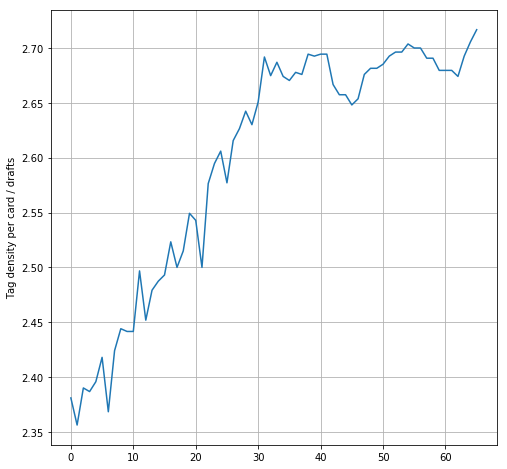

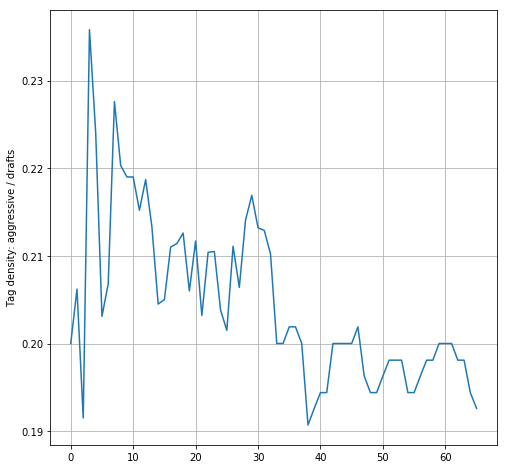

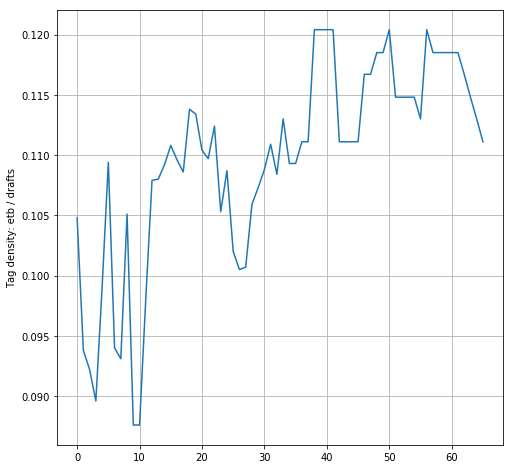

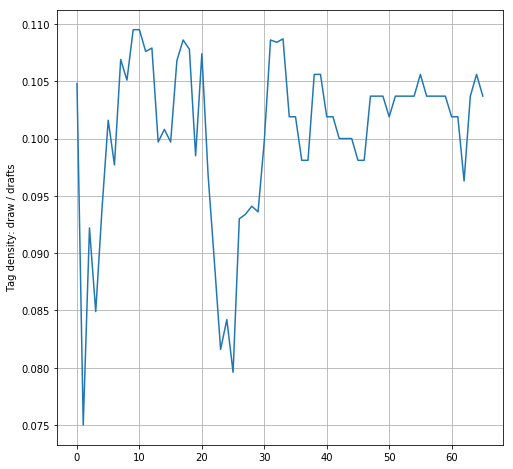

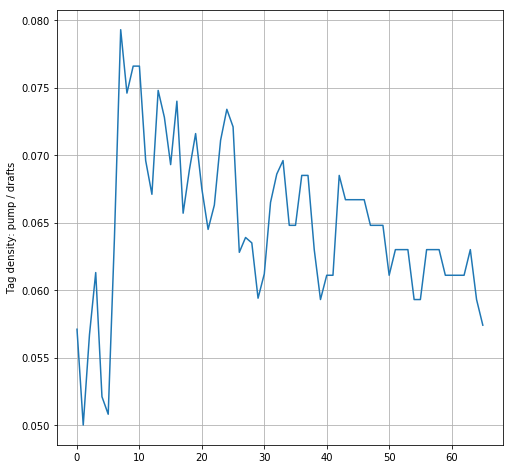

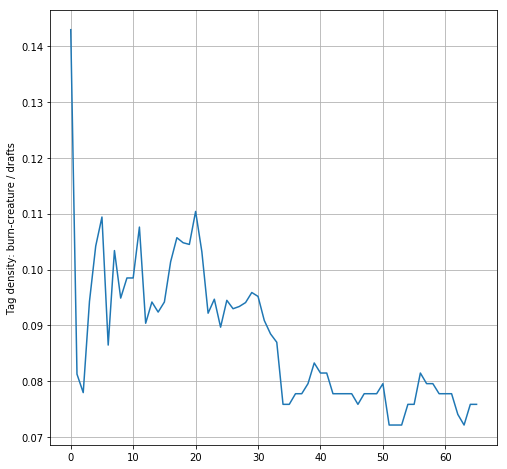

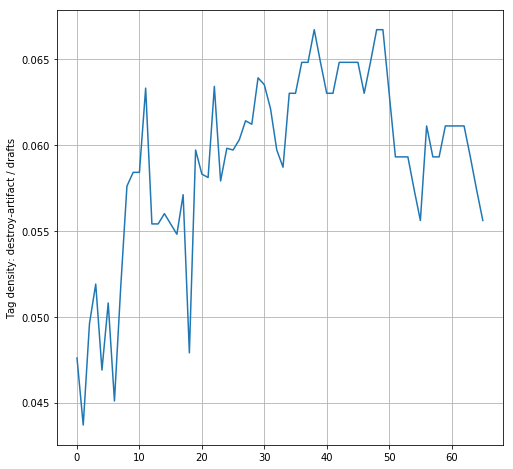

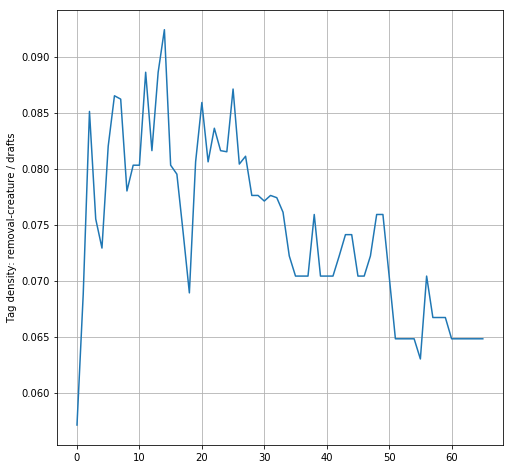

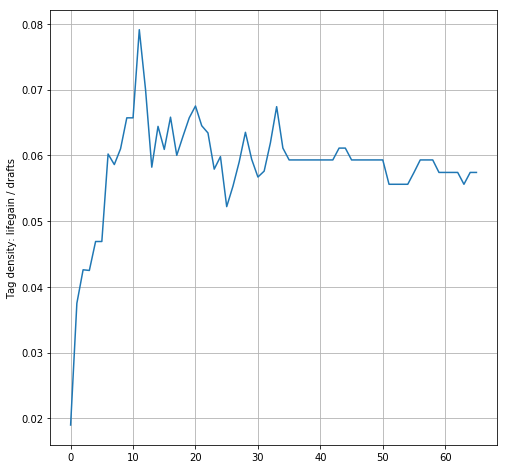

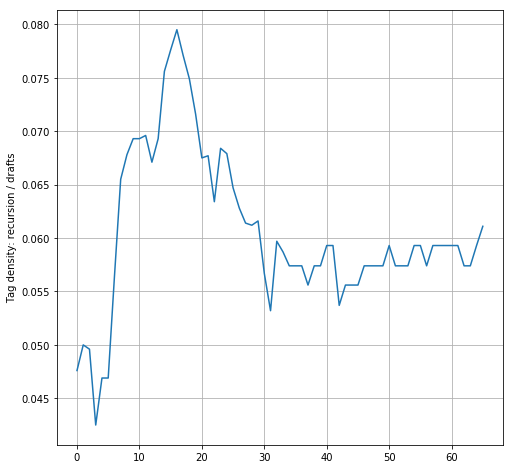

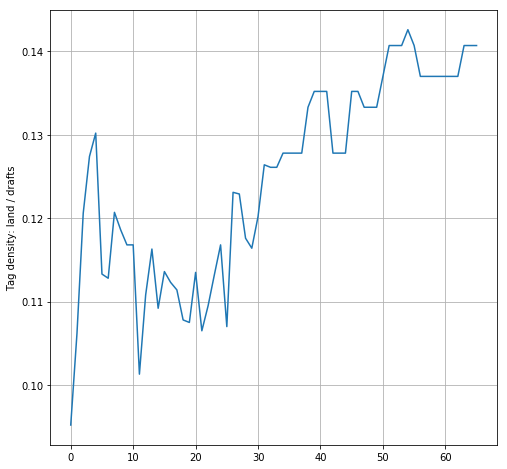

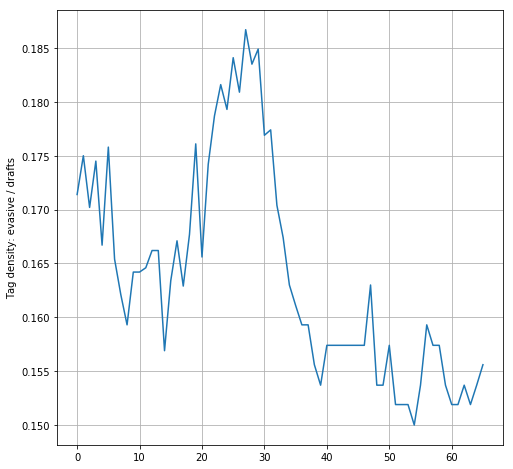

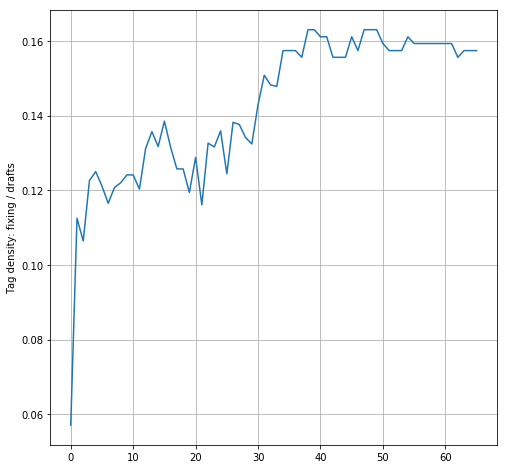

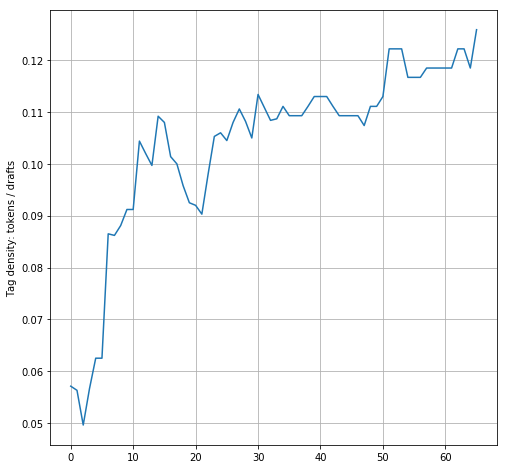

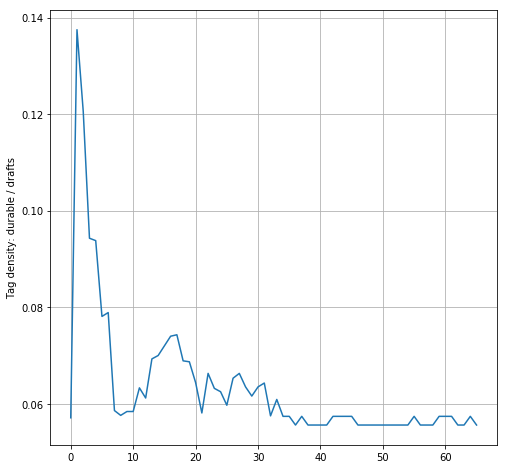

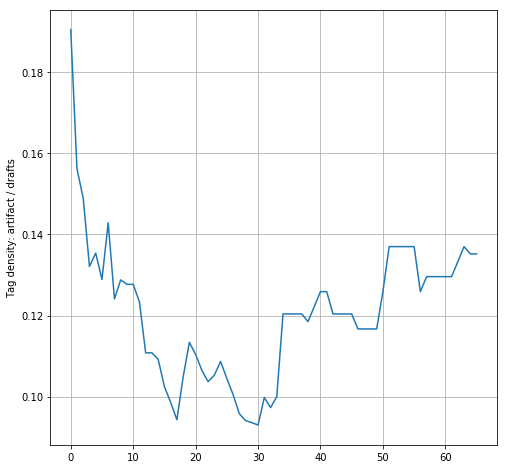

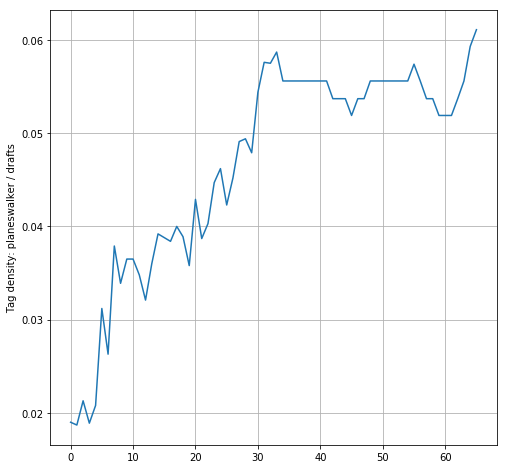

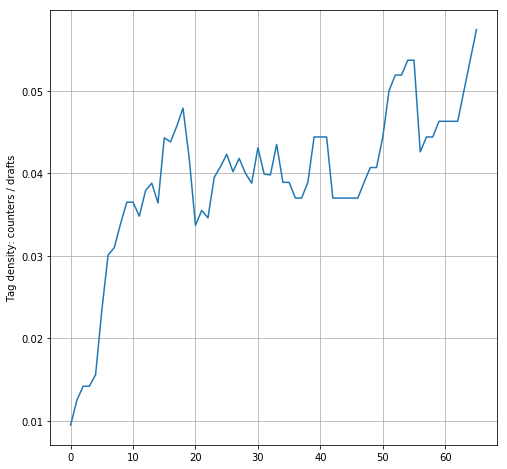

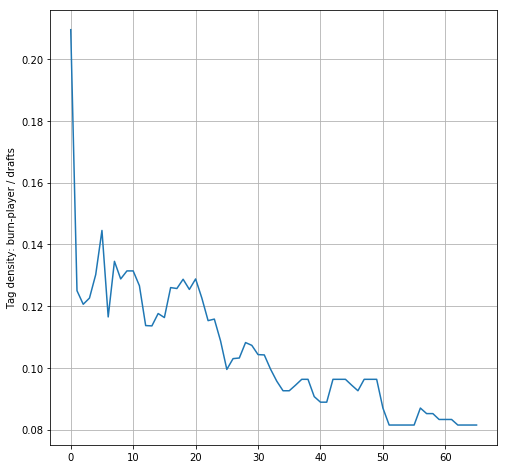

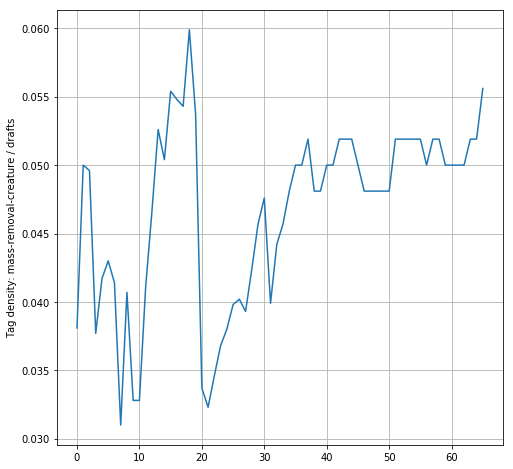

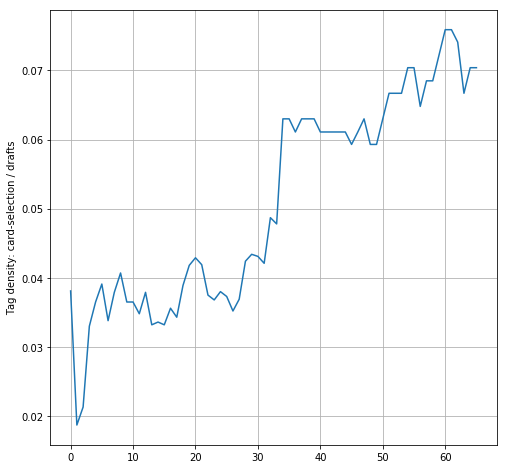

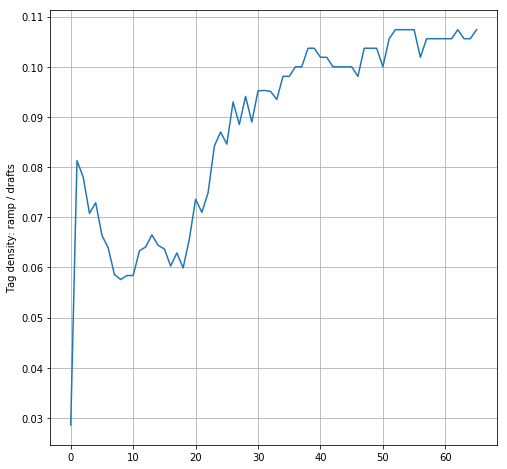

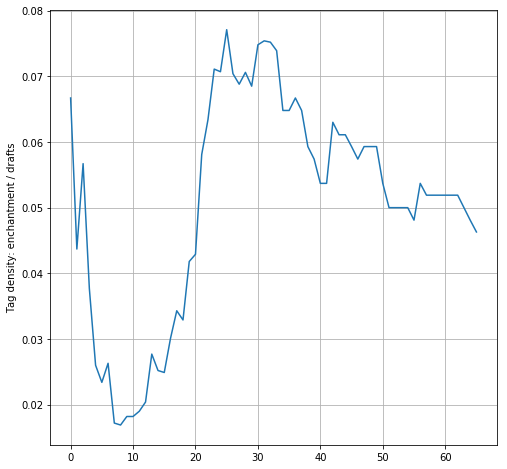

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

import os
reconstructed_path = 'reconstructed/'
rec_filenames = os.listdir('reconstructed')
numbered_path = 'cubes/'
cube_filenames = os.listdir('cubes')

all_filenames = []

for r in rec_filenames:
    all_filenames.append(reconstructed_path+r)
    
for c in cube_filenames:
    all_filenames.append(numbered_path+c)

class Cube():
    def __init__(self, filename, relevant_tags):
        tmp = filename.split('_')
        name = tmp[1]+'_'+tmp[2]
        self.name = name.replace('.txt', '')
        self.setCardlist(filename)
        self.tag_count = {}
        self.tag_total = 0
        self.convertCubeToTags()
        self.countTags()
        self.tag_density = round((self.tag_total+0.0)/self.cube_size, 4)
        self.calculateTagDensity(relevant_tags)
        
    def setCardlist(self, filename):
        my_file = open(filename, 'r')
        my_string = my_file.read()
        my_list = my_string.split('\n')
        if len(my_list) < 540:
            self.cardlist = my_list
        else:
            tmp_list = []
            for c in my_list:
                if c !='':
                    tmp = c.split(' ')
                    tmp_list.append(" ".join(tmp[1:]))
            self.cardlist = tmp_list

    def convertCubeToTags(self):
        self.cube_tags = {}
        self.cube_size = len(self.cardlist)
        for c in self.cardlist:
            self.cube_tags[c] = tag_dict[c]
        
    def countTags(self):
        for c in self.cube_tags:
            for t in self.cube_tags[c]:
                self.tag_total+=1
                if t not in self.tag_count:
                    self.tag_count[t] = 1
                else:
                    self.tag_count[t] += 1
                    
    def calculateTagDensity(self, relevant_tags):
        self.single_tag_density = {}
        for t in relevant_tags:
            td = round((self.tag_count[t]+0.0)/self.cube_size, 4)
            self.single_tag_density[t] = td
                
cubes = []
    
for f in all_filenames:
    cubes.append(Cube(f, relevant_tags))

ys = []
for c in cubes:
    ys.append(c.tag_density)
    
plt.plot(ys)
plt.ylabel('Tag density per card / drafts')
plt.grid(True)
plt.show()

for t in relevant_tags:
    ys = []
    for c in cubes:
        ys.append(c.single_tag_density[t])
    plt.plot(ys)
    plt.ylabel('Tag density: '+t+' / drafts')
    plt.grid(True)
    plt.show()